<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/pyintro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python入門(2)

- 関数
- リスト・タプル・辞書
- クラス
- 入出力
- おまけ (タートルグラフィックス)

このテキストは [京大	プログラミング演習 Python 2019](https://repository.kulib.kyoto-u.ac.jp/dspace/bitstream/2433/245698/1/Version2020_02_13_01.pdf) を参考にしています。説明が足りないところはリンク先のテキストで補ってください。

# 関数

Python入門(1)のプログラム5と6を組み合わせると、入力に対して一定レベルのエラーチェックを行い、高い精度で平方根を求めるプログラムができます。一方、読み込み・演算・表示という基本手順はプログラム1と変わらないのに、コードはかなり長くなっており、全体の見通しが悪くなっています。

ここではまとまった処理を関数として定義し、大まかな基本手順と細かな実現部分にわけてコーディングを行います。関数内部で定義された変数はローカルスコープなので関数の外側から参照や変更ができません。これによって関数内での処理が見通しやすくなります。

まず、入力を行う関数の定義は以下のようになります。

memo:  
インデントを下げるショートカットキーは ctrl+'}'

In [ ]:
def input_number():
  while True:
    x = input('Enter positive number> ')
    try:
      x = float(x)
    except ValueError:
      print(f'{x}は数値に変換できません。')
      continue
    except:
      print('予期せぬエラーです')
      sys.exit()
    if x <= 0:
      print(f'{x}は正の数値ではありません。')
      continue
    break
  return x

平方根を求める関数の定義は以下のようになります。

In [ ]:
def square_root(x):
  rnew = x
  while True:
    r1 = rnew
    r2 = x/r1
    rnew = (r1 + r2)/2
    if abs(r1 - r2) < 1.0E-6:
      break
  return rnew

全体の手順は以下のようになります。

In [ ]:
x = input_number()
sq = square_root(x)
print(f'Square root of {x} is {sq}.')

Enter positive number> 3
Square root of 3.0 is 1.7320508075688772.


### プログラム7

上の3つのコードをまとめたものです。

In [ ]:
%reset -f
# 平方根を求めるプログラム
import sys

def input_number():
  while True:
    x = input('Enter positive number> ')
    try:
      x = float(x)
    except ValueError:
      print(f'{x}は数値に変換できません。')
      continue
    except:
      print('予期せぬエラーです')
      sys.exit()
    if x <= 0:
      print(f'{x}は正の数値ではありません。')
      continue
    break
  return x

def square_root(x):
  rnew = x
  while True:
    r1 = rnew
    r2 = x/r1
    rnew = (r1 + r2)/2
    if r1 - r2 < 1.0E-6:
      break
  return rnew

x = input_number()
sq = square_root(x)
print(f'Square root of {x} is {sq}.')

Enter positive number> 5
Square root of 5.0 is 2.23606797749979.


## デフォルト引数

ここで関数 square_root内で繰り返しを打ち切る精度の値がコード中に直接書かれているのはあまり好ましくありません。グローバル定数とする方法もありますが、この定数定義を忘れると関数内でエラーが発生してしまいます。

そこで、関数の仕様を変更します。第2引数として精度を与えることができるようにして、もし第2引数が指定されていなければデフォルト値を使えるよう、デフォルト引数とします。なお、デフォルト引数が複数になったときに、任意のものが省略可能になって定義順に意味がなくなるので、デフォルト引数はキーワード引数として呼び出すのが無難です。

In [ ]:
def square_root(x, eps=1.0E-6):
  rnew = x
  while True:
    r1 = rnew
    r2 = x/r1
    rnew = (r1 + r2)/2
    if r1 - r2 < eps:
      break
  return rnew

In [ ]:
# 仮引数の順に実引数を与えて呼び出す
square_root(2, 1.0E-2)

1.4142156862745097

In [ ]:
# キーワード引数で呼び出す
square_root(2, eps=1.0E-6)

1.414213562373095

## 練習問題 2-1

Pythonでは関数を変数の値としたり、引数として別の関数に渡すことができます。[京大テキスト](https://repository.kulib.kyoto-u.ac.jp/dspace/bitstream/2433/245698/1/Version2020_02_13_01.pdf)のp.74 5.8節を参考にして、関数に関数を渡して実行するコードを作成してみてください。

# リスト・タプル・辞書

## リスト

C言語の配列にあたるものはPythonではリストで表現します。リストは全体を '[' と ']' で囲って、要素の区切りは ',' （カンマ）を使います。

リストは以下の特徴があります。

- 要素数が可変
  - 要素の追加や結合などのメソッドを持つ
- 各要素は同じ型でなくてもよい
- 一部の要素の取り出しにはスライスを用いる
  - 表記： リスト名[ スライスの開始 : スライスの終了 : ステップ ] 
  - ステップは省略可能
- リストのコピーは可能だが注意が必要

リストの要素へのアクセスは先頭を0番としたインデックスを用います。

In [ ]:
num_list = [10, 20, 30, 40, 50]
num_list[2]

30

スライスはリストの一部を取り出します。[ 先頭のインデックス : 終端のインデックス-1] の形で指定します。これは、スライス番号がインデックスが要素の間に振られていると考えるとわかりやすくなります。

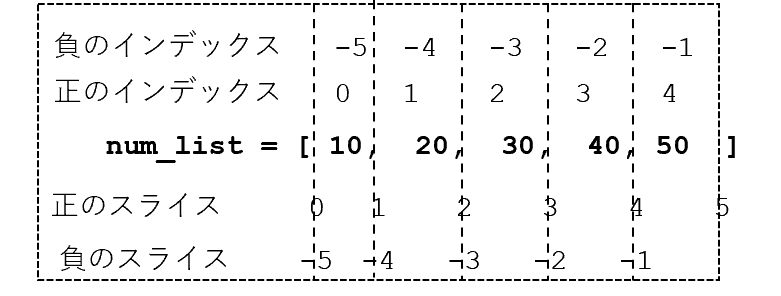

In [ ]:
num_list[1:4]

[20, 30, 40]

リストの定義は、要素を列挙する外延表記だけではなく、要素の性質を記述する内包表記が可能です。

In [ ]:
even_list = [i*2 for i in range(1, 11)]
even_list

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

リストの各要素についての処理は、ループ変数を必要としません。リストの先頭から順にひとつずつ要素を取り出してループ処理を行うというイメージです。

In [ ]:
for x in num_list:
  print(x)

10
20
30
40
50


インデックスを使う場合は以下のようにします。

In [ ]:
for i, x in enumerate(num_list):
  print(f'num_list[{i}] = {x}')

num_list[0] = 10
num_list[1] = 20
num_list[2] = 30
num_list[3] = 40
num_list[4] = 50


C言語の配列の場合と異なり、リストを格納した変数はコピーできます。ただし、コピーされるのは先頭要素のアドレスなので、メモリ上の実態は同じものを指します。別のリストを作成してコピーする場合は、a.copy() というメソッドを使います（リストが入れ子になっている場合はこの方法でもさらに注意が必要です）。

In [ ]:
a = [5, 8, 3]
b = a
print(b)
a[1] = 2
print(b)

[5, 8, 3]
[5, 2, 3]


In [ ]:
a = [5, 8, 3]
b = a.copy()
print(b)
a[1] = 2
print(b)

[5, 8, 3]
[5, 8, 3]


## タプル

タプルはカンマで区切られた要素を \() で囲ったものです。要素へのアクセスはインデックスによって行えますが、リストと違って要素の追加や変更はできません。リストのようにいつでも変更が可能なオブジェクトをミュータブル、タプルのように一度定義すると変更ができないオブジェクトをイミュータブルといいます。

In [ ]:
a = (2, 8, 7, 1, 5)
a[1]

8

In [ ]:
a[1] = 3

TypeError: ignored

## 辞書

キーと値のペアで複数の要素をまとめる方法です。要素へはインデックスではなく、キーでアクセスできます。キーは文字列などのイミュータブルなオブジェクトでなければいけません。辞書自体は要素の追加・変更・削除ができるミュータブルなオブジェクトです。

In [ ]:
b = {'name': 'Tom Bean', 'age': 21, 'point':80}
b['name']

'Tom Bean'

## 練習問題 2-2

以下に示す辞書を要素とするリストに対して、name と score を適切にフォーマットして出力するループを記述せよ。

In [ ]:
results = [{'name':'Asahi', 'score':68}, {'name':'Iino', 'score':79}, {'name':'Ueda', 'score':61}]

# クラス

C言語の構造体の考え方を発展させたものがクラスです。クラスは変数（の集まり）で表現された内部状態を持ち、その内部状態を使って何らかの処理を行う関数であるメソッドと合わせてクラスが定義されます。なお、クラス名は変数名と同じ規則で命名されますが、大文字で始め、複数の単語からなる場合はキャメルケース（各単語の先頭文字を大文字にして結合）とすることで変数名と区別する習慣になっています。

オブジェクト指向プログラミングでは、このクラス定義に具体的な値を与えることによってメモリ上の実体であるインスタンスを作成し、外部からそのインスタンスのメソッドを呼び出すことによって、メソッド実装の詳細は外部から隠蔽し、高いレベルのメッセージ交換のみで必要な処理を記述することができるようになります。

### プログラム8

例としてスタックをクラスとして定義してみます。スタックとは、棚のようなデータ構造で、入ってきたデータが順に積み重ねられ、出るときは一番最後に入ったデータから出て行きます。

\_\_init\_\_ というメソッドはコンストラクタとよばれ、インスタンスが作成されるときに自動的に呼び出されるメソッドです。各メソッドの引数には、先頭に自分自身のインスタンスを表すselfを書きますが、外部からの呼び出しのときには、この引数を書く必要はありません。

In [ ]:
class MyStack():
  def __init__(self, data):
    self.num_list = data

  def push(self, elem):
    self.num_list.append(elem)

  def pop(self):
    if self.is_empty() == True:
      return None
    else:
      x = self.num_list[-1]
      self.num_list = self.num_list[:-1]
      return x

  def is_empty(self):
    return self.num_list == []

  def clear(self):
    self.num_list = []

if __name__ == '__main__':
  st = MyStack([5, 2, 3])
  print(st.pop())
  print(st.pop())
  st.push(8)
  st.push(9)
  print(st.pop())
  print(st.pop())
  print(st.pop())
  print(st.pop())

3
2
[5, 8, 9]
9
8
5
None


プログラム8中のnum_listのようにインスタンス毎に用意される変数をインスタンス変数とよびます。インスタンス変数はメソッド内でself,を前に付けて定義され、外部からは インスタンス名.変数名 でアクセスします。一方、メソッド定義の外側で定義された変数はクラス変数とよばれ、そのクラスのすべてのインスタンスで共通の値を持ち、クラス名.変数名 の形でアクセスします。

変数名の前にアンダーバー2つを付けると、クラス外からは操作できないアクセス制限された変数になります。

# 入出力

ファイルを読み書きするためには、まずopen関数でファイル名とモードを指定して、戻り値でファイルオブジェクトを得ます。モードは'r'が読み込み、'w'が書き込みです。

内容の読み込みメソッドは read (全体) または readline（1行ずつ）を使います。1行ずつ読むときは、for文を使うこともできます。書き込みメソッドは　writeです。

処理が終われば、closeメソッドでファイルを閉じます。


プログラミング言語の用途別の有用性を評価したデータをファイルに書き出してみます。（評価値は架空のものです）

In [ ]:
data = ''', web, mobile, enterprise, embedded
Python, 80, 30, 90, 70
Java, 85, 60, 85, 40
C, 30, 40, 70, 90
'''

f = open('data.csv', 'w')
f.write(data)
f.close()

このファイルを読み込んで表示します。

In [ ]:
f = open('data.csv', 'r')
for line in f:
  elems = line.split(',')
  for e in elems:
    print(f'{e:>12s}', end='')
f.close()

                     web      mobile  enterprise   embedded
      Python          80          30          90         70
        Java          85          60          85         40
           C          30          40          70         90


ファイルの入出力はエラーを起こすことが多いので、プログラムが途中で終わってもcloseされるように、多くの場合は withブロックを使ってファイルの入出力を行います。

In [ ]:
with open('data.csv', 'r') as f:
  for line in f:
    elems = line.split(',')
    for e in elems:
      print(f'{e:>12s}', end='')

                     web      mobile  enterprise   embedded
      Python          80          30          90         70
        Java          85          60          85         40
           C          30          40          70         90


## 練習問題 2-3

data.csvを読み込み、新たなプログラミング言語に関する評価を追加して、data2.csvとして保存してください。

# おまけ：タートルグラフィックス

京大テキストの6章の内容をColabで実行する場合は、以下のコードを参考にしてください。

In [ ]:
!pip install ColabTurtle
import ColabTurtle.Turtle as turtle

  Created wheel for ColabTurtle: filename=ColabTurtle-2.1.0-py3-none-any.whl size=7655 sha256=fab002a6932ea5c29bdb6fce641c36d9d9998031544bb945ff2918017fde6486
  Stored in directory: /root/.cache/pip/wheels/0d/ab/65/cc4478508751448dfb4ecb20a6533082855c227dfce8c13902
Successfully built ColabTurtle


In [ ]:
turtle.initializeTurtle()
turtle.pendown()

turtle.forward(100)
turtle.left(90)
turtle.forward(100)

# 練習問題の解答例

## 練習問題 2-1

In [ ]:
def f():
  print("f says Hello")

# 関数を引数でもらって実行する関数
def F(y):
  print("In F, ", end="")
  y()

# f を実行
f()

# f を F に渡して F を実行
F(f)

f says Hello
In F, f says Hello


## 練習問題 2-2

In [ ]:
results = [{'name':'Asahi', 'score':68}, {'name':'Iino', 'score':79}, {'name':'Ueda', 'score':61}]

for r in results:
  print(f"{r['name']:8} : {r['score']}")

Asahi    : 68
Iino     : 79
Ueda     : 61


## 練習問題 2-3

書き出したファイルが見えない場合は、エクスプローラペインを更新してください。

In [ ]:
new_data = "JavaScript, 90, 30 , 40, 20 "

with open('data.csv', 'r') as f:
  data = f.read()
data = data + new_data
with open('data2.csv', 'w') as f:
  f.write(data)